# U.S. Flight Cancellation Analysis

## Preliminary Wrangling

This document explores a dataset on flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. The data was obtained from [The Bureau of Transportation Statistics](https://www.transtats.bts.gov/Fields.asp?Table_ID=236). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
import os
import glob
from shutil import copyfile
pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
# find number of flights recorded per year
path = "C:/Apps/dat/all/*.csv"
for fname in glob.glob(path):
    df=pd.read_csv(fname, dtype=object, delimiter=",", encoding='latin-1')
    print(df['Year'].iloc[0],"=",len(df.index))
    df = df.iloc[0:0]

1987 = 1311826
1988 = 5202096
1989 = 5041200
1990 = 5270893
1991 = 5076925
1992 = 5092157
1993 = 5070501
1994 = 5180048
1995 = 5327435
1996 = 5351983
1997 = 5411843
1998 = 5384721
1999 = 5527884
2000 = 5683047
2001 = 5967780
2002 = 5271359
2003 = 6488540
2004 = 7129270
2005 = 7140596
2006 = 7141922
2007 = 7453215
2008 = 2389217


The 2008 file is smaller as it has only half a years records.

In [3]:
# join all (whole) 21st century files to create a single csv file to conduct multi-year analysis
# reluctantly not joining all data due to computer memory constraints
copyfile('C:/Apps/dat/2001.csv', 'C:/Apps/dat/all.csv')

filenames = ["2002.csv","2003.csv", "2004.csv", "2005.csv","2006.csv", "2007.csv"]
sep = ","

with open("C:/Apps/dat/all.csv", "a+") as targetfile:
    for filename in filenames :
        with open("C:/Apps/dat/"+filename, "r") as f:
            next(f) # << only if the first line contains headers
            for line in f:
                data = line.split(sep)
                targetfile.write(line)

In [4]:
# read muti-year csv
alll = pd.read_csv('C:/Apps/dat/all.csv', delimiter=",", encoding='latin-1')

C:\Apps\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# overview of data shape
alll.shape

(46592682, 29)

In [6]:
# overview of data info including missing values
alll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46592682 entries, 0 to 46592681
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

In [7]:
pd.set_option('display.max_columns', None)
alll

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2001,1,17,3,1806.0,1810,1931.0,1934,US,375,N700äæ,85.0,84.0,60.0,-3.0,-4.0,BWI,CLT,361,5,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2001,1,18,4,1805.0,1810,1938.0,1934,US,375,N713äæ,93.0,84.0,64.0,4.0,-5.0,BWI,CLT,361,9,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2001,1,19,5,1821.0,1810,1957.0,1934,US,375,N702äæ,96.0,84.0,80.0,23.0,11.0,BWI,CLT,361,6,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2001,1,20,6,1807.0,1810,1944.0,1934,US,375,N701äæ,97.0,84.0,66.0,10.0,-3.0,BWI,CLT,361,4,27,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2001,1,21,7,1810.0,1810,1954.0,1934,US,375,N768äæ,104.0,84.0,62.0,20.0,0.0,BWI,CLT,361,4,38,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46592677,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,NaN,0,0.0,0.0,0.0,0.0,0.0
46592678,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,NaN,0,0.0,0.0,0.0,0.0,0.0
46592679,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,NaN,0,0.0,0.0,15.0,0.0,0.0
46592680,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,NaN,0,0.0,0.0,0.0,0.0,36.0


### What is the structure of your dataset?

The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. Each year of data is contained in a single CSV file, each file with c. 5,000,000 records and the whole dataset consists of 22 CSV files. 

To ease processing demands, only 21st century years have been loaded to understand the structure and features. The dataset has several columns, the description of each is as follows:

1. Year - 1987-2008
2. Month - numerical month notation, 1-12
3. DayofMonth - numerical day notation, 1-31
4. DayOfWeek - numerical notation, 1 (Monday) - 7 (Sunday)
5. DepTime - actual departure time (local, hhmm)
6. CRSDepTime - scheduled departure time (local, hhmm)
7. ArrTime - actual arrival time (local, hhmm)
8. CRSArrTime - scheduled arrival time (local, hhmm)
9. UniqueCarrier - unique carrier code
10. FlightNum - flight number
11. TailNum - plane tail number
12.	ActualElapsedTime - elapsed time of flight, in minutes
13.	CRSElapsedTime - computerised reservation system (CRS) elapsed time of flight, in minutes
14.	AirTime - flight time, in minutes
15.	ArrDelay - arrival delay, in minutes
16.	DepDelay - departure delay, in minutes
17.	Origin - origin IATA airport code
18.	Dest - destination IATA airport code
19.	Distance - in miles
20.	TaxiIn - taxi in time, in minutes
21.	TaxiOut - taxi out time in minutes
22.	Cancelled - was the flight cancelled, 1 = yes, 0 = no
23.	CancellationCode - reason for cancellation, A = carrier, B = weather, C = NAS, D = security
24.	Diverted - was the flight diverted, 1 = yes, 0 = no
25.	CarrierDelay - in minutes
26.	WeatherDelay - in minutes
27.	NASDelay - National Air System delay, in minutes
28.	SecurityDelay - in minutes
29.	LateAircraftDelay - in minutes

### What is/are the main feature(s) of interest in your dataset?

Of interest is finding out whether there is a consistency in flights being delayed or cancelled, that being related to a particular airport, a particular day of the week or a particular airline.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The time data, cancellation and delay-related data will be of particular use in investigating the above features. 

Of further use will be explanatory reference dictionaries provided to give the full name to the Unique Carrier Code and IATA Airport Code loaded and shown below:

In [8]:
# Unique Carrier Code dictionary
ucc = pd.read_csv('C:/Apps/datexp/carriers.csv', delimiter=",", encoding='latin-1')
ucc.head(5)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [9]:
# IATA Airport Code dictionary
airp = pd.read_csv('C:/Apps/datexp/airports.csv', delimiter=",", encoding='latin-1')
airp.head(5)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


Given the explanatory reference data above, and the features of interest highlighted for this data exploration, the raw data will be edited as follows to create an easier dataset to work with:

In [10]:
# remove all data not needed for the analysis focussing on cancellations and delays
pdata = pd.DataFrame()
pdata = alll[['Year','Month','DayOfWeek','UniqueCarrier','ArrDelay','DepDelay','Origin','Cancelled','CancellationCode',
              'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
pdata['Hour'] = alll['CRSDepTime'].astype(str).str[:-2]

# join above reference tables
pdata = pdata.merge(ucc, left_on='UniqueCarrier', right_on='Code')
pdata = pdata.merge(airp, left_on='Origin', right_on='iata')

# expand character notation to full string using dictionaries
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October',
        11:'November', 12:'December'}
day = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
state = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida',
        'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
        'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine',
        'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi',
        'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire',
        'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands',
        'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}
cc = {'A':'Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'}
pdata['month'] = pdata['Month'].apply(month.get)
pdata['Day'] = pdata['DayOfWeek'].apply(day.get)
pdata['State'] = pdata['state'].apply(state.get)
pdata['Cancellationcode'] = pdata['CancellationCode'].apply(cc.get)

# drop and rename columns
pdata.drop(['Code','UniqueCarrier','Origin','CancellationCode','iata','state','country','lat',
                    'long','Month','DayOfWeek'], axis=1, inplace=True)
pdata = pdata.rename(columns={'month':'Month', 'Cancellationcode':'CancellationCode', 'Description':'Airline'})

# save dataset for easy retrieval
pdata.to_csv(r'C:/Apps/dat/pdata.csv', index = False, header=True)

In [11]:
# load edited dataset
pdata = pd.read_csv('C:/Apps/dat/pdata.csv', delimiter=",", encoding='latin-1')

C:\Apps\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Univariate Exploration

Univariate exploration will analyse one variable at a time only. The below investigations have questions as titles to guide the exploration. 

In [12]:
# for simple charting, the below function renames axis and titles which will be called regularly
def pltlab(title,x_label,y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### Have flight numbers between 2001 and 2007 grown?

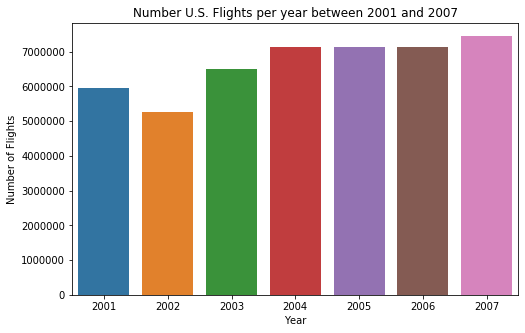

In [13]:
plt.figure(figsize=[8, 5])
a = sb.countplot(data=pdata,x='Year')
pltlab('Number U.S. Flights per year between 2001 and 2007','Year','Number of Flights')

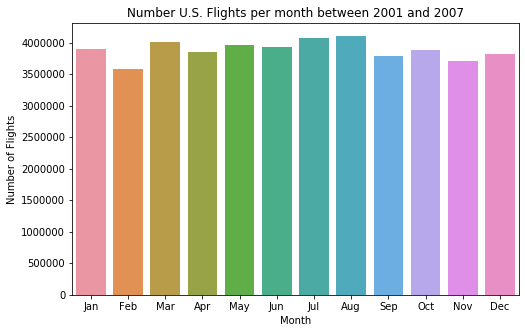

In [14]:
plt.figure(figsize=[8, 5])
a = sb.countplot(data=pdata,x='Month')
pltlab('Number U.S. Flights per month between 2001 and 2007','Month','Number of Flights')
a.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

Yes, flights have increased since 2001. Interestingly, 2002 had a significant reduction in flights perhaps in reaction to the 9/11 terror attack.

There are slightly more flights in the summer months compared to the winter months.

### What type of cancellations occur to flights between 2001 and 2007?

Flights cancellations are broken down in the dataset by type. It will therefore be interesting to explore the frequent reasons for flight cancellations.

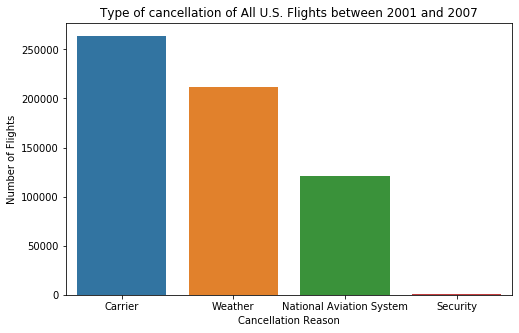

In [15]:
plt.figure(figsize=[8, 5])
a = sb.countplot(data=pdata,x='CancellationCode',order=['Carrier', 'Weather', 'NAS', 'Security'])
pltlab('Type of cancellation of All U.S. Flights between 2001 and 2007','Cancellation Reason','Number of Flights')
a.set_xticklabels(['Carrier','Weather','National Aviation System','Security']);

### What is the distribution in lengths of delay and their reasons between 2001 and 2007 ?

The second variable to analyse will be length of delay. It is assumed there will be relatively few long delays and more short delays, be it in arrival or departure. 

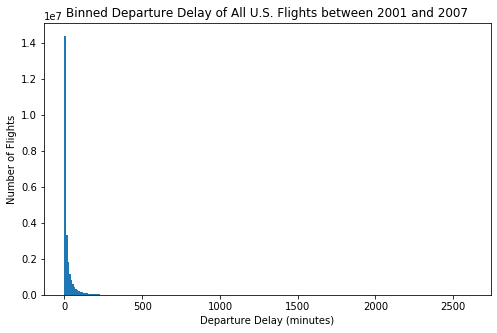

In [16]:
# standard scaled plot for departure delay in minutes
binsize = 10
bins = np.arange(0, pdata['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pdata, x = 'DepDelay', bins = bins)
pltlab('Binned Departure Delay of All U.S. Flights between 2001 and 2007','Departure Delay (minutes)','Number of Flights')
plt.show()

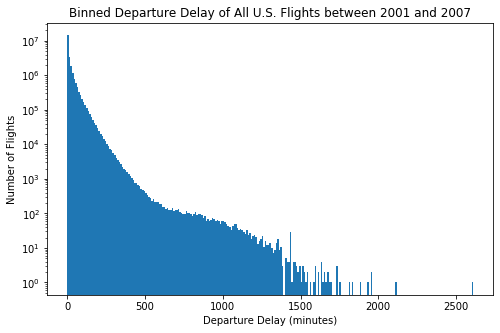

In [17]:
# there's a long tail in the distribution, so a log scale may be more appropriate to see the lengthier delays
binsize = 10
bins = np.arange(0, pdata['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pdata, x = 'DepDelay', bins = bins)
plt.yscale('log')
pltlab('Binned Departure Delay of All U.S. Flights between 2001 and 2007','Departure Delay (minutes)','Number of Flights')
plt.show()

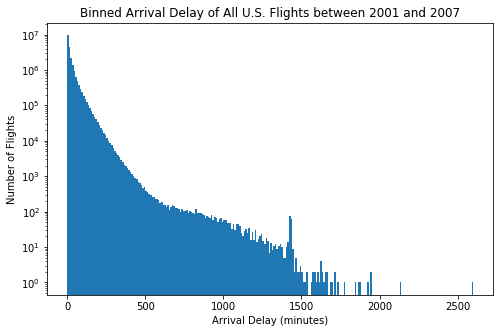

In [18]:
# log scaled plot for arrival delay in minutes
binsize = 10
bins = np.arange(0, pdata['ArrDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pdata, x = 'ArrDelay', bins = bins)
plt.yscale('log')
pltlab('Binned Arrival Delay of All U.S. Flights between 2001 and 2007','Arrival Delay (minutes)','Number of Flights')
plt.show()

Both profiles of departure and arrival delay time have an extended profile with the majority of flights only having a few minutes delay.

Breaking the delay down, the dataset allows the understanding of whether the delay was due to the Carrier, Weather, National Air System, Security or Late Aircraft. The below shows proportion of delay reason:

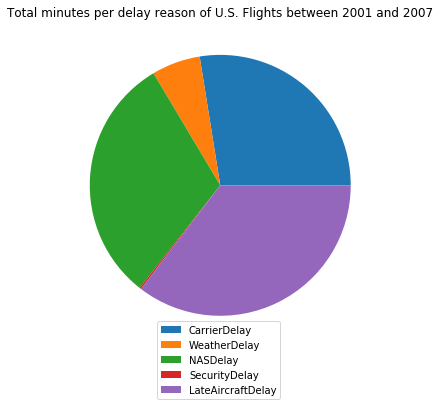

In [19]:
labels = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
plt.figure(figsize=(6, 6), dpi=72)
pdata[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum().plot.pie(labels=labels, labeldistance=None)
plt.title('Total minutes per delay reason of U.S. Flights between 2001 and 2007')
plt.legend(labels=labels, loc = 'upper right')
plt.axis('off')
plt.legend(bbox_to_anchor=(0.7, 0.1))
plt.show()

Late Aircraft Delay has the greatest sum of delays in minutes with Security delays having the least.

The below breaks down delay reason by minutes.

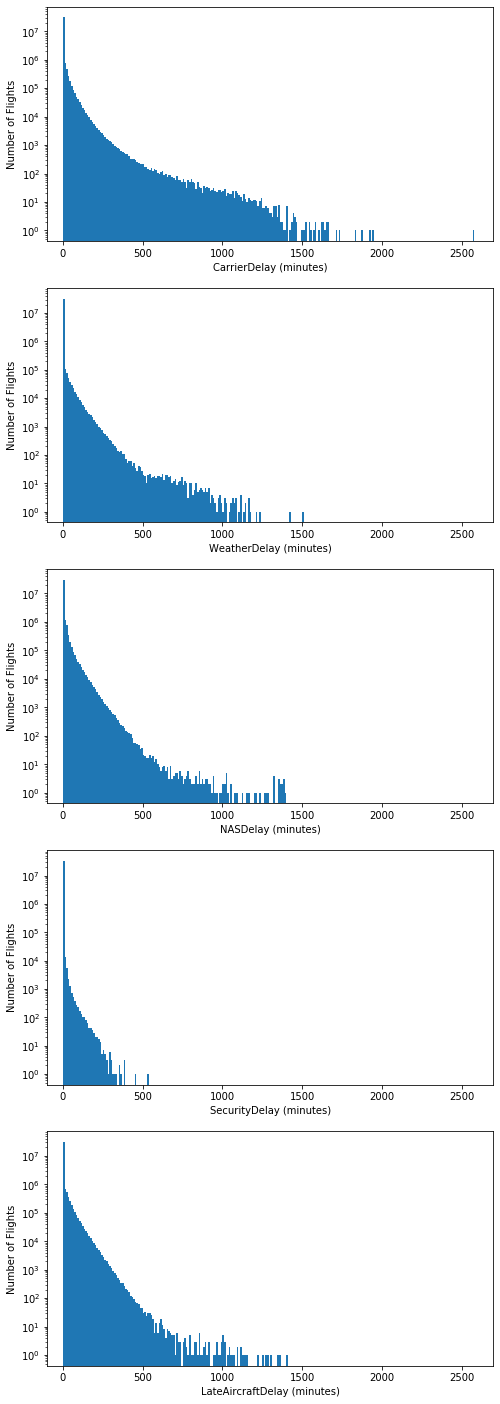

In [20]:
fig, ax = plt.subplots(nrows=5, figsize = [8,25])

variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
binsize = 10

for i in range(len(variables)):
    var = variables[i]
    binsize = 10
    bins = np.arange(0, pdata[var].max()+binsize, binsize)
    ax[i].hist(data = pdata, x = var, bins = bins)
    ax[i].set_xlabel('{} (minutes)'.format(var))
    ax[i].set_ylabel('Number of Flights')
    ax[i].set_xlim(-100,2700)
    ax[i].set_yscale('log')
    
plt.show()

The above plots help clarify the reasons behind certain bands of time delay for flights. Security delays appear to be a reason for flight delays of less than 500 minutes, whereas carrier delays can result in the lengthiest delays in the dataset.

### How many flights were conducted between 2001 and 2007 by airline, city and state?

One of the aims of this analysis is to look at whether there is a relationship between airline or airport. The following univariate analysis will therefore identify the number of flights by airline and by airport.

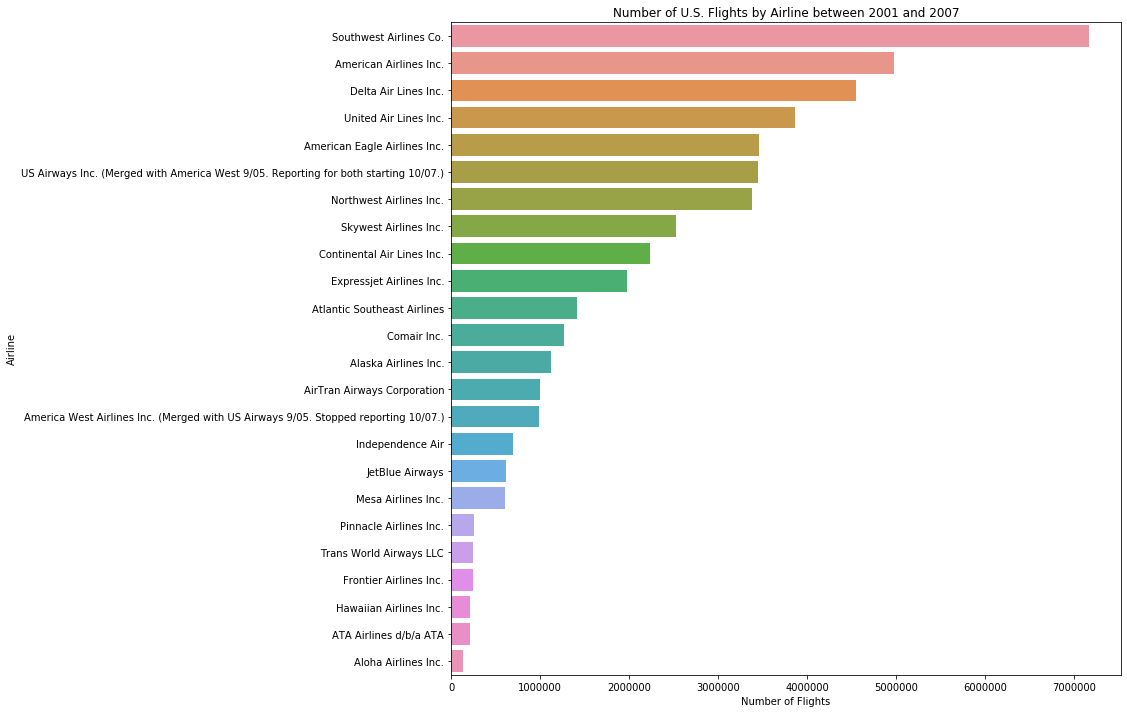

In [21]:
# plot count chart
plt.figure(figsize=(12,12))
sb.countplot(data=pdata, y='Airline', order=pdata.Airline.value_counts().index)
pltlab('Number of U.S. Flights by Airline between 2001 and 2007','Number of Flights','Airline')

With the data, the number of flights can be used to identify the busiest airports, cities and states in the U.S. However, this data may be too numerous to plot on a single chart:

In [22]:
# identify unique values for airport and city
print("Number of unique airports in dataset: ",pdata['airport'].nunique())
print("Number of unique cities in dataset: ",pdata['city'].nunique())

Number of unique airports in dataset:  326
Number of unique cities in dataset:  306


Over 300 airports and cities in the dataset is too numerous to plot on one graph. Therefore only the 20 busiest airports and cities will be plotted below:

[Text(0.5, 1.0, 'Number of U.S. Flights by City between 2001 and 2007')]

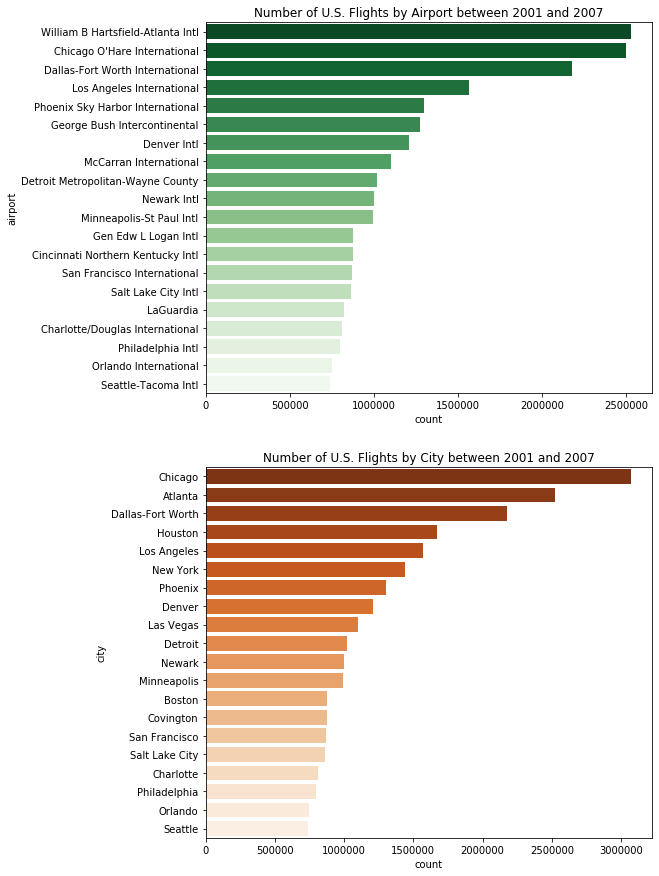

In [23]:
# plot count charts for airports and cities
fig, ax = plt.subplots(nrows=2, figsize = [8,15])
sb.countplot(palette = "Greens_r", data=pdata, y='airport', ax = ax[0], 
             order=pdata['airport'].value_counts().iloc[:20].index).set(title = 
            'Number of U.S. Flights by Airport between 2001 and 2007')
sb.countplot(palette = "Oranges_r", data=pdata, y='city', ax = ax[1], 
             order=pdata['city'].value_counts().iloc[:20].index).set(title = 
            'Number of U.S. Flights by City between 2001 and 2007')

There should only be 50 unique values for States in the dataset, therefore the count chart below shows the most and least busiest states with regards to flight departures and arrivals:

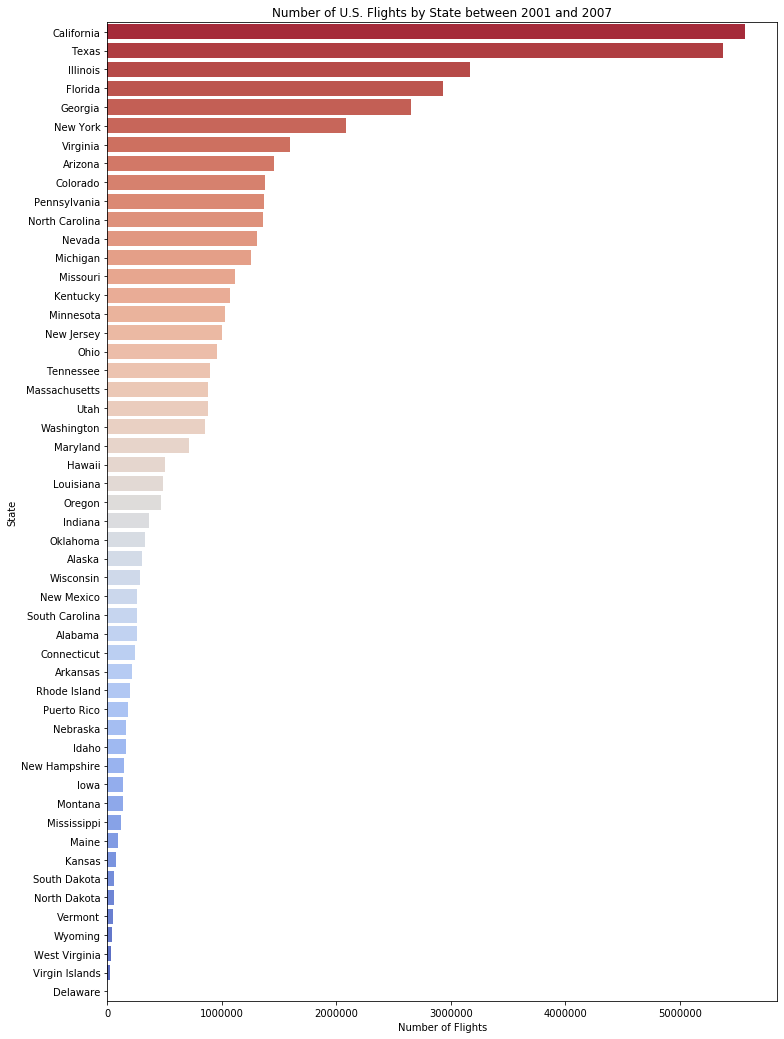

In [24]:
# plot count chart for state
plt.figure(figsize=(12,18))
sb.countplot(palette = "coolwarm_r", data=pdata, y='State', order=pdata['State'].value_counts().index)
pltlab('Number of U.S. Flights by State between 2001 and 2007','Number of Flights','State')

The above graph makes it look as if Delaware has no flights. However, it is not the case as shown below:

In [25]:
print("Number of flights from/to the Delaware State in dataset: ", (pdata.State == 'Delaware').sum())

Number of flights from/to the Delaware State in dataset:  765


Delaware has such few flights because Delaware is centrally situated in the Northeast megalopolis region of cities along I-95. Therefore, Delaware commercial airline passengers most frequently use Philadelphia International Airport (PHL), Baltimore-Washington International Thurgood Marshall Airport (BWI) and Washington Dulles International Airport (IAD) for domestic and international transit. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Analysing the departure delay of all flights in the U.S. between 2001 and 2007 understandably had a very large range of values from 0 to 2500 minutes. Due to the very long tail suggesting only a limited number of flights had the longest delays, the data was transformed and illustrated on a log scale. Under the transformation, it could be identified that the number of flights having a delay longer than 500 minutes was 100 per bin and longer than 1500 minutes was 10 per bin.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the number of flights to/from airports and cities, the range of values was too large to plot on one graph and therefore only the busiest were plotted. Considering there are only 50 states, the thought was this would be suitable for one graph. However, as investigated above, the state with the fewest flights (Delaware) had such a difference compared to the state with the busiest flights, that it appeared as zero in the graph which through investigation is not the case.

## Bivariate Exploration

Bivariate analysis is the simultaneous analysis of two variables (attributes).

### Which airlines and airports have the most cancellations?

Cancellations are numerous as shown in the previous analysis. The below analysis shows which airlines and airports have the most and what the dominant reasons for those cancellations are. 

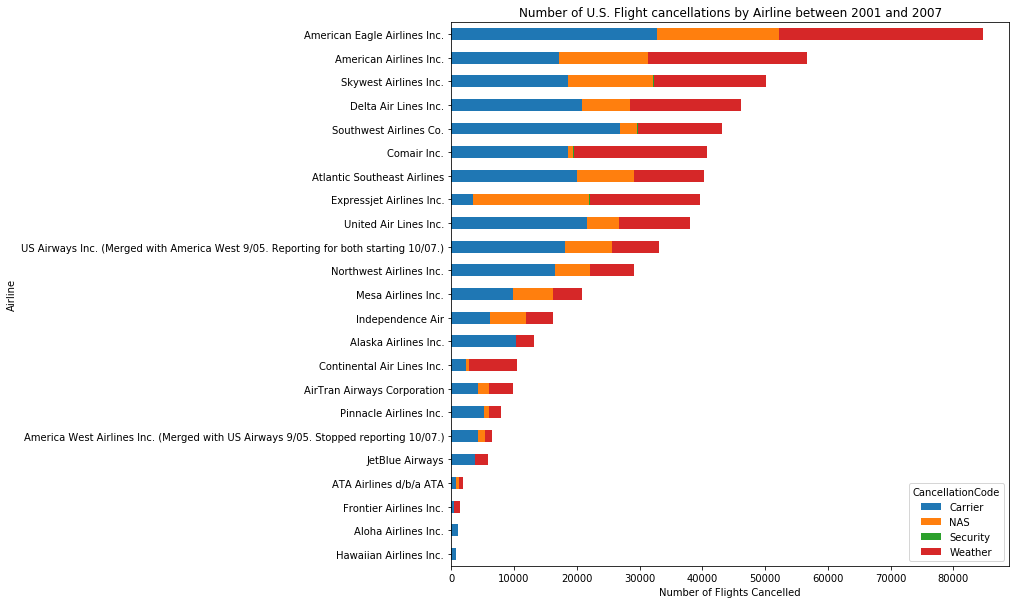

In [26]:
# create dataset from original
airlcanc = pd.DataFrame()
airlcanc[['Airline','CancellationCode']] = pdata[['Airline','CancellationCode']]
airlcanc.dropna(inplace=True)
airlcanc.reset_index(drop=True, inplace=True)
airlcanc = airlcanc.groupby(['Airline', 'CancellationCode'])['CancellationCode'].count().unstack()
airlcanc = airlcanc.fillna(0)
airlcanc['sum'] = airlcanc.apply(lambda row: row.Carrier + row.Weather + row.NAS + row.Security, axis=1)

# re-index to create size order to stacked bar chart
newindex = airlcanc.sort_values('sum', ascending=True).index
airlcanc = airlcanc.reindex(newindex)

# plot stacked bar chart
airlcanc.drop('sum', axis=1, inplace=True)
airlcanc.plot.barh(stacked=True, figsize=(10, 10))
pltlab('Number of U.S. Flight cancellations by Airline between 2001 and 2007','Number of Flights Cancelled','Airline')

As illustrated above, American Eagle Airlines have the most flight cancellations between 2001 and 2007. The most common reason for most airlines for cancellation is themselves, followed by weather and the National Aviation System. Security very rarely is a cause for cancellation. 

Whilst American Eagle Airlines have the most flight cancellations, it does not necessarily imply they are the worst performing as the above data is simply a count of cancellation occurrence. If this is modified to be a proportion of total flights per airline, then the airlines most prone to cancellations will become apparent:

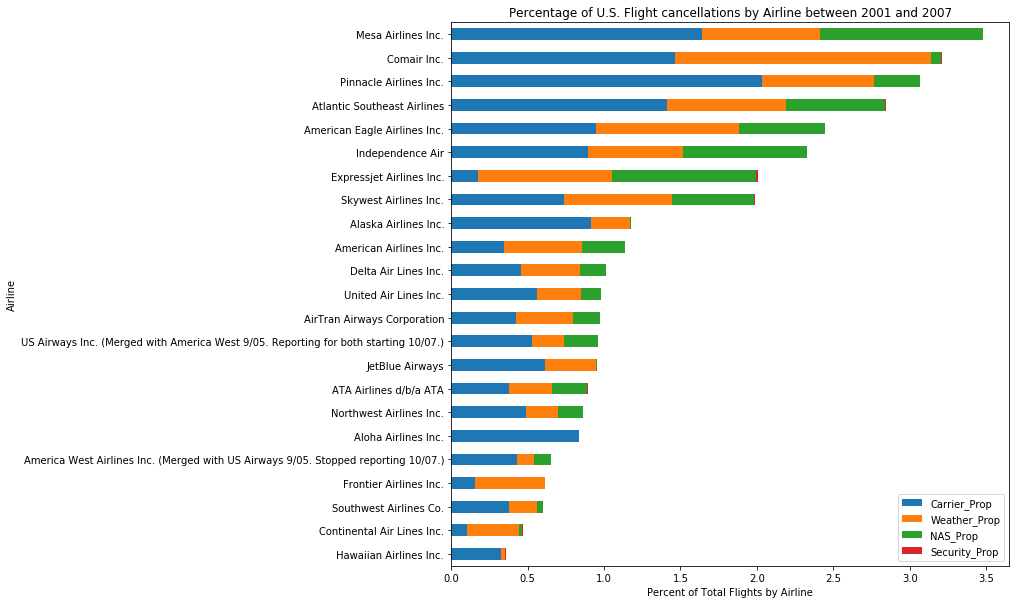

In [27]:
# create dataset from original
airlcancprop = pd.DataFrame()
airlcancprop = airlcanc
airlcancproptot = pd.DataFrame()
airlcancproptot = pdata['Airline'].value_counts().rename_axis('Airline').reset_index(name='sum_flights')
airlcancprop = airlcancprop.merge(airlcancproptot, left_on='Airline', right_on='Airline')

# calculate proportions
airlcancprop['Carrier_Prop'] = (airlcancprop['Carrier'] / airlcancprop['sum_flights'])*100
airlcancprop['Weather_Prop'] = (airlcancprop['Weather'] / airlcancprop['sum_flights'])*100
airlcancprop['NAS_Prop'] = (airlcancprop['NAS'] / airlcancprop['sum_flights'])*100
airlcancprop['Security_Prop'] = (airlcancprop['Security'] / airlcancprop['sum_flights'])*100
airlcancprop.drop(['Carrier','Weather','NAS','Security','sum_flights'], axis=1, inplace=True)
airlcancprop['sum'] = airlcancprop.apply(lambda row: row.Carrier_Prop + row.Weather_Prop + row.NAS_Prop + row.Security_Prop, axis=1)

# re-index to create size order to stacked bar chart
newindex = airlcancprop.sort_values('sum', ascending=True).index
airlcancprop = airlcancprop.reindex(newindex)
airlcancprop = airlcancprop.reset_index(drop=True)
airlcancprop = airlcancprop.set_index('Airline')
airlcancprop.drop('sum', axis=1, inplace=True)

# plot proportional stacked bar chart
airlcancprop.plot.barh(stacked=True, figsize=(10, 10))
pltlab('Percentage of U.S. Flight cancellations by Airline between 2001 and 2007','Percent of Total Flights by Airline','Airline')

The order of airlines by percentage of flights which were cancelled has changed significantly from the above graph simply counting the number of cancellations. The following observations can be made:
- Mesa Airlines has the greatest proportion of its flights cancelled
- Pinncale Airlines Inc have the greatest proportion of its flights cancelled due to the carrier
- Comair Inc have the greatest proportion of its flights cancelled due to the weather
- Mesa Airlines have the greatest proportion of its flights cancelled due to the NAS
- Express Jet have the greatest proportion of its flights cancelled due to the Security

Focussing on the cancellation reason for flights being Carrier, it can be shown the worst performing airlines are as follows:

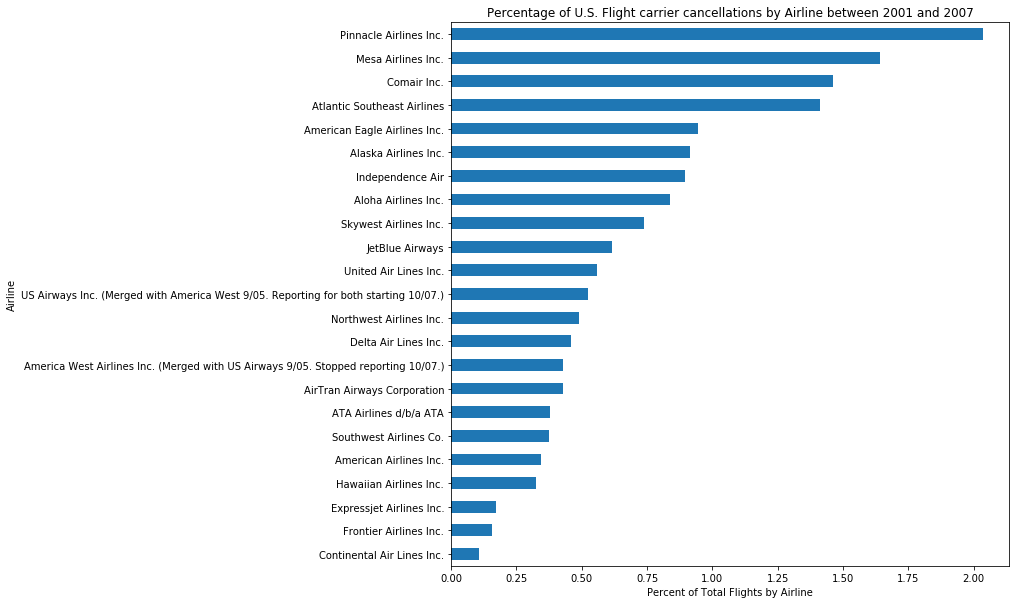

In [28]:
# create dataset from above work
airlcancpropcarr = pd.DataFrame()
airlcancpropcarr = airlcancprop[['Carrier_Prop']]

# order by greatest proportional value
airlcancpropcarr = airlcancpropcarr.Carrier_Prop.sort_values()

# plot chart
airlcancpropcarr.plot.barh(figsize=(10, 10))
pltlab('Percentage of U.S. Flight carrier cancellations by Airline between 2001 and 2007','Percent of Total Flights by Airline','Airline')

Pinnacle Airlines is the worst performing airline for flight cancellations by themselves. Interestingly, most airlines which conduct the most flights have the fewest proportional cancellations providing themselves as a reason. As seen in the graph above, these airlines are more susceptible to other cancellations reasons such as NAS and Weather. 

The same analysis can be done for airports:

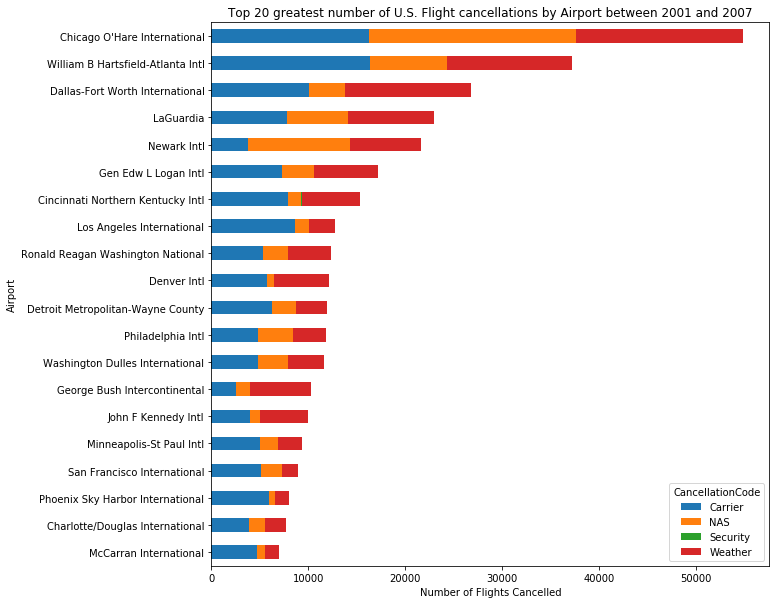

In [29]:
# create dataset from original
airpcanc = pd.DataFrame()
airpcanc[['airport','CancellationCode']] = pdata[['airport','CancellationCode']]
airpcanc.dropna(inplace=True)
airpcanc.reset_index(drop=True, inplace=True)
airpcanc = airpcanc.groupby(['airport', 'CancellationCode'])['CancellationCode'].count().unstack()
airpcanc = airpcanc.fillna(0)
airpcanc['sum'] = airpcanc.apply(lambda row: row.Carrier + row.Weather + row.NAS + row.Security, axis=1)

# re-index to create size order to stacked bar chart
newindex = airpcanc.sort_values('sum', ascending=False).index
airpcanc = airpcanc.reindex(newindex)

# select only first 20 to be visible on chart
airpcancc = pd.DataFrame()
airpcancc = airpcanc.iloc[:20]
newindex = airpcancc.sort_values('sum', ascending=True).index
airpcancc = airpcancc.reindex(newindex)
airpcancc.drop('sum', axis=1, inplace=True)

# plot stacked bar chart
airpcancc.plot.barh(stacked=True, figsize=(10, 10))
pltlab('Top 20 greatest number of U.S. Flight cancellations by Airport between 2001 and 2007','Number of Flights Cancelled','Airport')

As illustrated above, Chicago O'Hare International have the most flight cancellations between 2001 and 2007, principally due to NAS.

Proportionally to number of flights, the worst performing airport with regards to cancellations is:

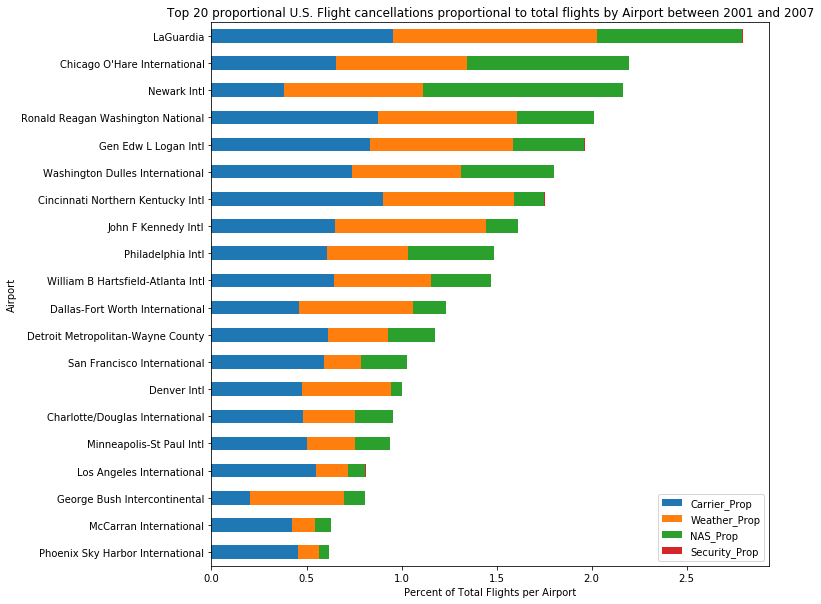

In [30]:
# create dataset from original
airpcancprop = pd.DataFrame()
airpcancprop = airpcanc
airpcancproptot = pd.DataFrame()
airpcancproptot = pdata['airport'].value_counts().rename_axis('airport').reset_index(name='sum_flights')
airpcancprop = airpcancprop.merge(airpcancproptot, left_on='airport', right_on='airport')

# calculate proportions
airpcancprop['Carrier_Prop'] = (airpcancprop['Carrier'] / airpcancprop['sum_flights'])*100
airpcancprop['Weather_Prop'] = (airpcancprop['Weather'] / airpcancprop['sum_flights'])*100
airpcancprop['NAS_Prop'] = (airpcancprop['NAS'] / airpcancprop['sum_flights'])*100
airpcancprop['Security_Prop'] = (airpcancprop['Security'] / airpcancprop['sum_flights'])*100
airpcancprop.drop(['Carrier','Weather','NAS','Security','sum_flights'], axis=1, inplace=True)
airpcancprop['sum'] = airpcancprop.apply(lambda row: row.Carrier_Prop + row.Weather_Prop + row.NAS_Prop + row.Security_Prop, axis=1)
airpcancpropp = airpcancprop.iloc[:20]

# re-index to create size order to stacked bar chart
newindex = airpcancpropp.sort_values('sum', ascending=True).index
airpcancpropp = airpcancpropp.reindex(newindex)
airpcancpropp = airpcancpropp.reset_index(drop=True)
airpcancpropp = airpcancpropp.set_index('airport')
airpcancpropp.drop('sum', axis=1, inplace=True)

# plot proportional stacked bar chart
airpcancpropp.plot.barh(stacked=True, figsize=(10, 10))
pltlab('Top 20 proportional U.S. Flight cancellations proportional to total flights by Airport between 2001 and 2007','Percent of Total Flights per Airport','Airport')

Whilst LaGuardia airport has the fourth highest number of cancellations, out of total flights originating from that airport it has the highest proportions of cancellations of any airport in the U.S. The primary reason for these cancellations is weather closely followed by carrier. 

A Security cancellation can be directly related to the airport and is not illustrated well on the above graph. Therefore, the below plot focusses solely on the number of flight security cancellations by airport:

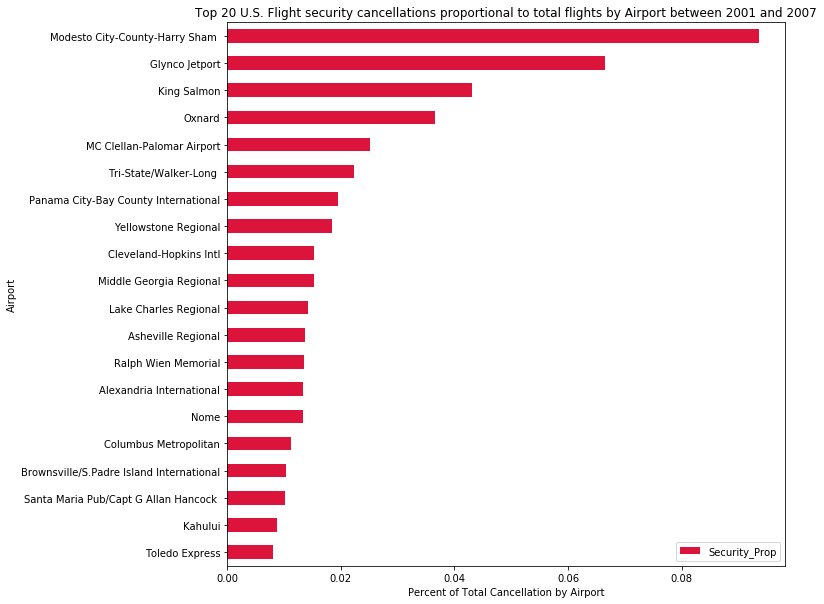

In [31]:
# create dataset from above work
airpcancpropsec = pd.DataFrame()
airpcancpropsec = airpcancprop[['airport','Security_Prop']]
airpcancpropsec = airpcancpropsec.sort_values(by=['Security_Prop'], ascending=False)

# get top 20
airpcancpropsec = airpcancpropsec.iloc[:20]

# order by greatest proportional value
newindex = airpcancpropsec.sort_values('Security_Prop', ascending=True).index
airpcancpropsec = airpcancpropsec.reindex(newindex)

# plot chart
airpcancpropsec.plot.barh(figsize=(10, 10),x='airport', color='crimson')
pltlab('Top 20 U.S. Flight security cancellations proportional to total flights by Airport between 2001 and 2007','Percent of Total Cancellation by Airport','Airport')

Interestingly, none of the major airports are in the above chart of the top 20 airports with security cancellations as a proportion of total flights.

### Is there a seasonality to cancellations?

Seasonality of cancellations may be apparent in the dataset by year, month, or day of week. The below analysis will investigate this. The first analysis will focus on cancellations by year to see whether, through time, there has been a reduction in cancellation rates per year.

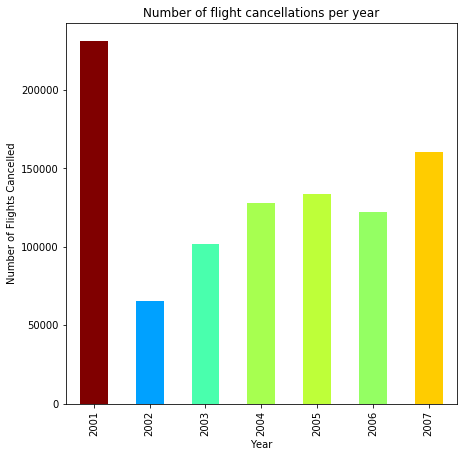

In [32]:
# create dataset from original
yrcan = pd.DataFrame()
yrcan = pdata[['Year','Cancelled']]

# calculate total number of flights per year
yrcanc = yrcan.groupby('Year').count().rename(columns={'Cancelled':'Total_Flights'})

# calculate total number of cancellations per year
yrcanc['Cancellations'] = yrcan.groupby(['Year'])['Cancelled'].agg('sum')

# calculate proportion of flight cancellations per year
yrcanc['Prop'] = (yrcanc['Cancellations'] / yrcanc['Total_Flights']) * 100

# select data
yrcanctot = yrcanc['Cancellations']

# plot chart
colors = cm.jet(yrcanctot / float(max(yrcanctot)))
yrcanctot.plot.bar(figsize=(7, 7), color=colors)
pltlab('Number of flight cancellations per year','Year','Number of Flights Cancelled')

2001 had the greatest number of cancelled flights, likely due to the 9/11 terror attack but this will be confirmed when cancellations by month is illustrated. 

Flight cancellations have generally been increasing since 2002.

Is this the same for the proportion of flights cancelled per year?

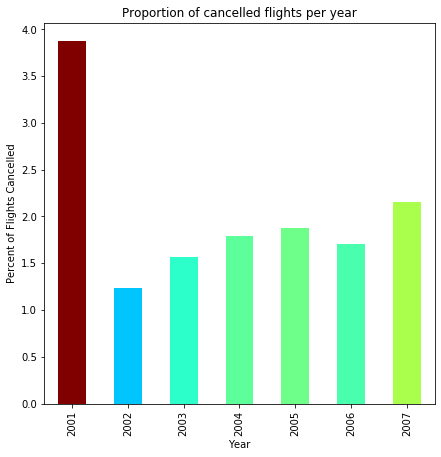

In [33]:
# select data
yrcancprop = yrcanc['Prop']

# plot chart
colors = cm.jet(yrcancprop / float(max(yrcancprop)))
yrcancprop.plot.bar(figsize=(7, 7), color=colors)
pltlab('Proportion of cancelled flights per year','Year','Percent of Flights Cancelled')

There is little difference between the proportion of flights cancelled and the total flight cancelled per year.

Is there a seasonality related to month? For the below analysis, 2001 has been withdrawn as it is an anomalous year with the very high proportions of cancellations.

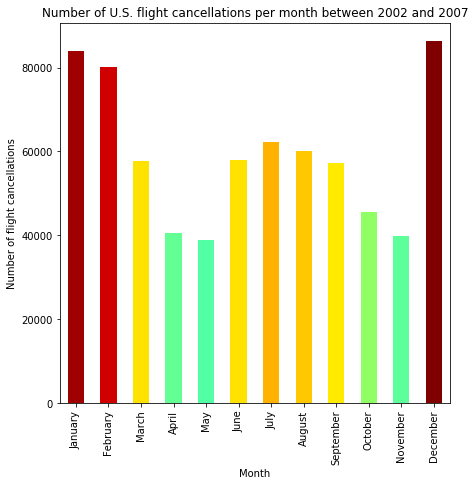

In [34]:
# create dataset from original
mcan = pd.DataFrame()
mcan = pdata[['Year','Month','Cancelled']]
mcan = mcan[mcan.Year > 2001]

# calculate total number of flights per year
mcanc = mcan.groupby('Month').count().rename(columns={'Cancelled':'Total_Flights'})

# calculate total number of cancellations per year
mcanc['Cancellations'] = mcan.groupby(['Month'])['Cancelled'].agg('sum')

# calculate proportion of flight cancellations per year
mcanc['Prop'] = (mcanc['Cancellations'] / mcanc['Total_Flights']) * 100

# order data
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mcancc = mcanc.reindex(new_order, axis=0)

# select data
mcanctot = mcancc['Cancellations']

# plot chart
colors = cm.jet(mcanctot / float(max(mcanctot)))
mcanctot.plot.bar(figsize=(7, 7), color=colors)
pltlab('Number of U.S. flight cancellations per month between 2002 and 2007','Month','Number of flight cancellations')

As can be seen in the figure above, generally the winter months (December to February) have a higher number of cancellations compared to the summer months. 

Is this the same pattern observed in the proportions of cancellations per number of flights per month?

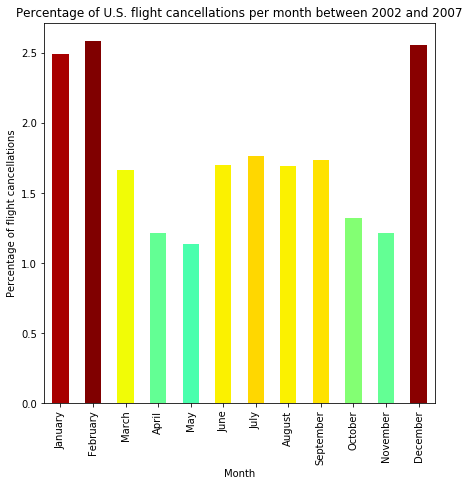

In [35]:
# select data
mcanctotp = mcancc['Prop']

# plot chart
colors = cm.jet(mcanctotp / float(max(mcanctotp)))
mcanctotp.plot.bar(figsize=(7, 7), color=colors)
pltlab('Percentage of U.S. flight cancellations per month between 2002 and 2007','Month','Percentage of flight cancellations')

Whilst the above percentage of flight cancellations per month is very similar to the total number, there is a slightly higher proportion of flight cancellations in February compared to January, whilst the total cancellations is greater in January. 

Is there a pattern of cancellations related to day of the week?

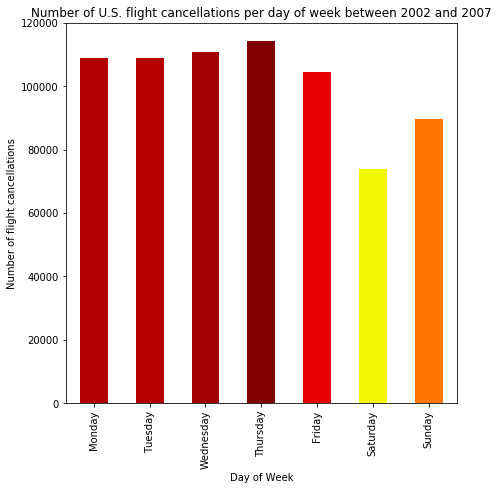

In [36]:
# create dataset from original
dcan = pd.DataFrame()
dcan = pdata[['Year','Day','Cancelled']]
dcan = dcan[dcan.Year > 2001]

# calculate total number of flights per year
dcanc = dcan.groupby('Day').count().rename(columns={'Cancelled':'Total_Flights'})

# calculate total number of cancellations per year
dcanc['Cancellations'] = dcan.groupby(['Day'])['Cancelled'].agg('sum')

# calculate proportion of flight cancellations per year
dcanc['Prop'] = (dcanc['Cancellations'] / dcanc['Total_Flights']) * 100

# order data
new_orderd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dcancc = dcanc.reindex(new_orderd, axis=0)

# select data
dcanctot = dcancc['Cancellations']

# plot chart
colors = cm.jet(dcanctot / float(max(dcanctot)))
dcanctot.plot.bar(figsize=(7, 7), color=colors)
pltlab('Number of U.S. flight cancellations per day of week between 2002 and 2007','Day of Week','Number of flight cancellations')

As can be seen in the figure above, generally the working week days have a higher number of cancellations compared to the weekend days. 

Is this the same pattern observed in the proportions of cancellations per number of flights per day of week?

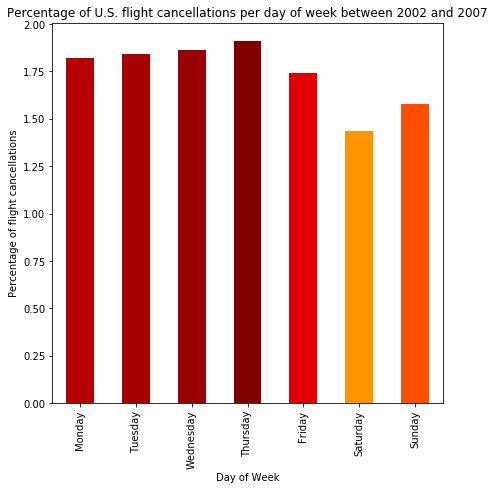

In [37]:
# select data
dcanctotp = dcancc['Prop']

# plot chart
colors = cm.jet(dcanctotp / float(max(dcanctotp)))
dcanctotp.plot.bar(figsize=(7, 7), color=colors)
pltlab('Percentage of U.S. flight cancellations per day of week between 2002 and 2007','Day of Week','Percentage of flight cancellations')

Proportionally, the percentage of total flights cancelled is very similar to the number of flights cancelled.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The primary feature under analysis in this section was flight cancellations. Flight cancellations were broken down by airline and airport, and then analysed by year, month and day of week. 

As observed, flight cancellations in number were highest for those airlines which had the greatest number of flights. However, when looking the proportion of flights conducted by airlines that were cancelled, it was the smaller, lesser known airlines who cancelled the higher proportion of flights. This may not be so obvious as it is very common to learn of the flight cancellations by major airlines. 

Flight cancellations by airport also indicated it was the major airports or hubs that had most cancellations. When looking at the proportion of flights originating from a specific airport that were then cancelled, the major airports were still present, and the order shuffled slightly. 

Flight cancellations by year, month and day of week also yielded interesting results. The year 2001 is anomalous because of the 9/11 terror attack. However, since that year flight cancellations have been increasing almost year on year. There also appears to be a month seasonality to flight cancellations with greater cancellations within the winter months. Furthermore, the working week appears to have a greater proportion of flight cancellations compared to the weekend. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Whilst it is a straight-forward observation to make that more flights lead to more cancellations for both airport and airline, the proportions of cancellations do not follow the same trend. For airlines, having a greater number of flights does not mean a proportional increase in cancellations. Whereas, for airports it is the case that operating a greater number of flights leads to a greater proportion of cancellations.

## Multivariate Exploration

Multivariate exploration involves three or more variables to investigate data. 

Given the analysis focus above on flight cancellations, the below analysis will delve deeper into cancellations initially focussing on whether carriers have been improving with regards to cancellations between 2003 and 2007. This analysis must start from 2003 as that was when cancellations started to be categorized int he dataset by reason.

In [38]:
# sort data
cc = pd.DataFrame()
cc = pdata[['Year','Airline','CancellationCode']]

# create df of total flights per year per airline
cc2 = cc.groupby(['Year','Airline']).size().unstack(fill_value=0)
cc2.drop('Trans World Airways LLC', axis=1, inplace=True)
cc2 = cc2.iloc[2:]

# create df of total carrier cancellations per year per airline
cc3 = cc[(cc['CancellationCode'] == 'Carrier')]
cc3 = cc3.groupby(['Year','Airline']).size().unstack(fill_value=0)

# calculate percentage of flights cancelled per year per airline
cc4 = pd.DataFrame()
cc4 = (cc3/cc2)*100

# drop all columns that have nan to make plot clearer
cc4 = cc4.dropna(axis=1)
cc4 = cc4.reset_index()

# remove long titles
rep = 'Inc.', 'Corporation', 'Co.', '(Merged with America West 9/05. Reporting for both starting 10/07.)'
for re in rep:
    cc4 = cc4.rename(columns = lambda x: x.replace(re, ''))

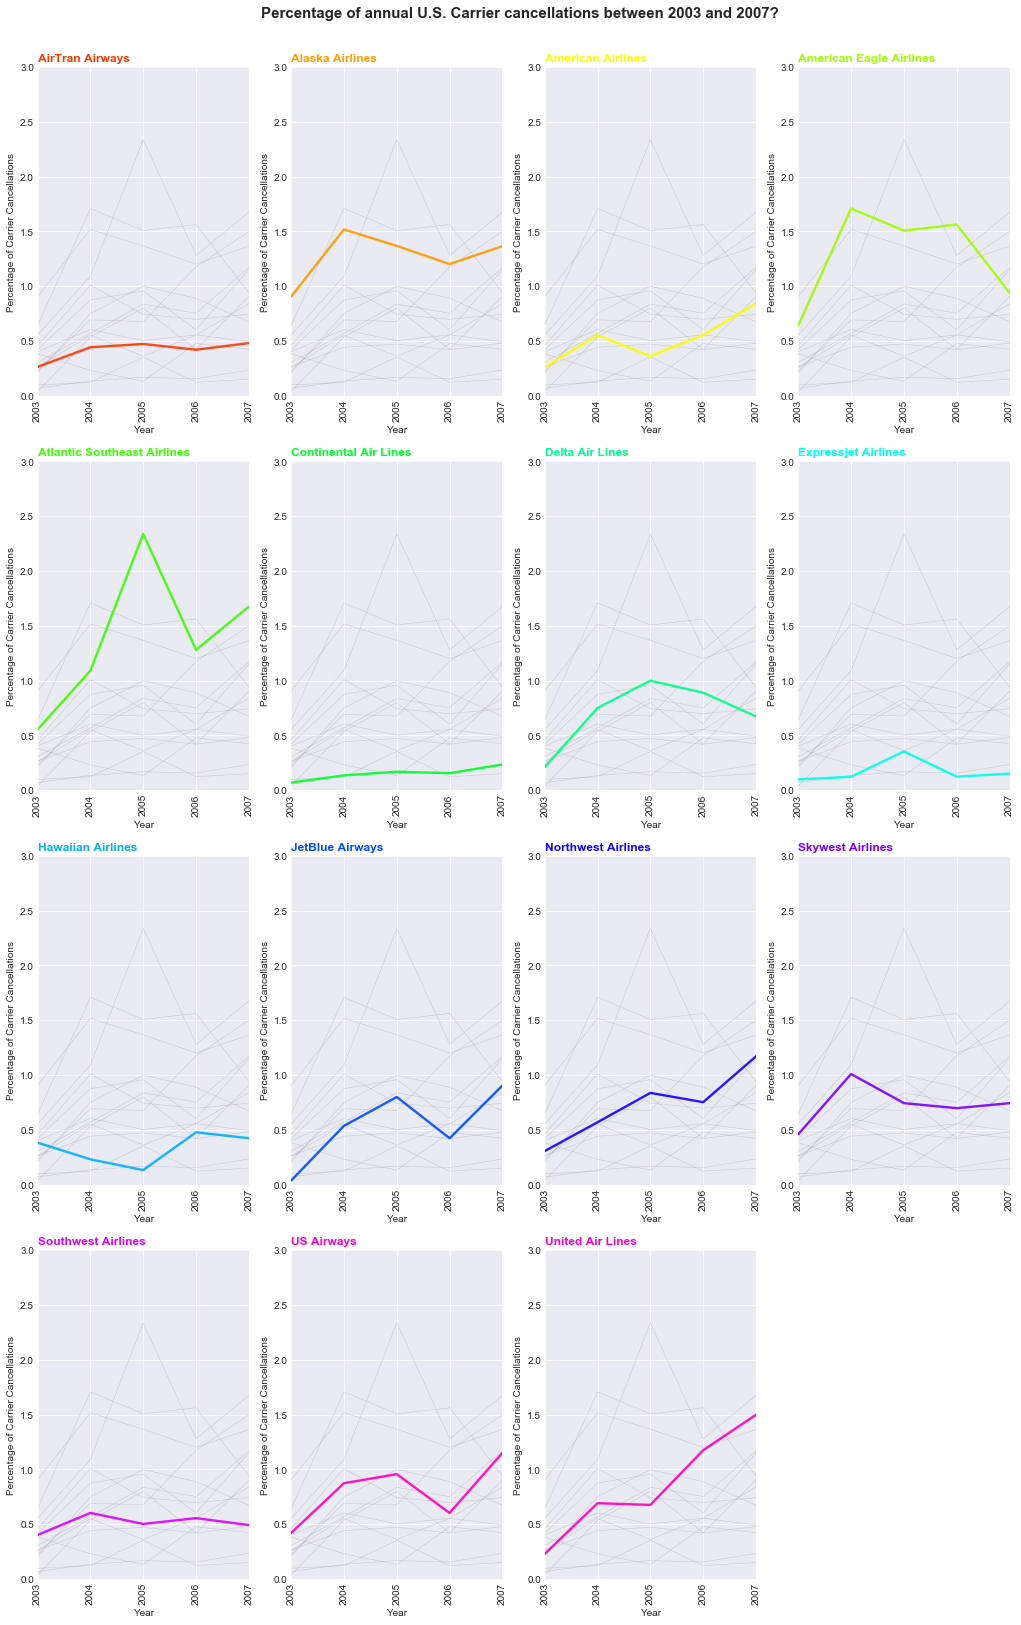

In [39]:
# plot results
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('gist_rainbow', 15)
fig = plt.figure(figsize=(20, 14))
num=0
for column in cc4.drop('Year', axis=1):
    num+=1
    plt.subplot(4,4,num)
    for v in cc4.drop('Year', axis=1):
        plt.plot(cc4['Year'], cc4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    plt.plot(cc4['Year'], cc4[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    plt.xlim(2003,2007)
    plt.ylim(0,3)
    plt.title(column, loc='left', fontsize=12, fontweight='semibold', color=palette(num))
    plt.tick_params('x', labelrotation=90)
    plt.xlabel('Year')
    plt.ylabel('Percentage of Carrier Cancellations')
plt.suptitle("Percentage of annual U.S. Carrier cancellations between 2003 and 2007?", fontsize=15, fontweight='semibold', 
             x=0.46, y=1.66)
plt.subplots_adjust(bottom=0.1, right=0.8, top=1.6)
plt.show()

All Carrier cancellations have increased as a proportion of their total flights from 2003 to 2007! Not one Carrier has decreased their cancellations between that time frame.

The below will focus on seasonality of cancellations. The bivariate analysis identified how cancellations have changed by year, month and day of week, but is there an overall time relationship from 2001 to 2007 with regards to flight cancellations?

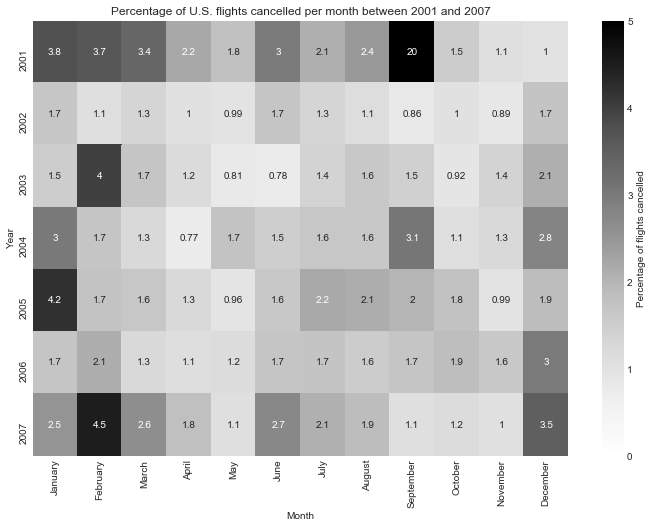

In [40]:
# calculate total number of flights cancelled per month
mncan = pd.DataFrame()
mncan = pdata[['Year','Month','Cancelled']]
mncan = mncan.groupby(['Year','Month']).agg('sum').unstack()

# calculate total number of flights per month
mncann = pd.DataFrame()
mncann = pdata[['Year','Month','Cancelled']]
mncann = mncann.groupby(['Year','Month']).agg('count').unstack()

# calculate percentage of flights cancelled per month
mncannn = (mncan/mncann)*100
mncannn.columns = mncannn.columns.droplevel(0)

# order results
mncannn = mncannn[new_order]

# plot results
fig, ax = plt.subplots(figsize=(12,8))
ax = sb.heatmap(mncannn, vmin=0, vmax=5, annot=True, cmap="Greys", cbar_kws={'label': 'Percentage of flights cancelled'})
ax.set_title('Percentage of U.S. flights cancelled per month between 2001 and 2007')
plt.show()

It can be seen above that whilst winter months have a higher percentage of flight cancellations, it is not the case for every winter month of a particular year. There is much more variability perhaps indicating time-specific events such as bad weather existing in one month one year but not in the next. 

Of note, September 2001 value is 20% of flights cancelled, probably due to the 9/11 terror attack. Interestingly, whilst 2001 was taken out of earlier analyses because it was viewed that the 9/11 terror attack was biasing results, the percentage of flight cancellations earlier in the year were also much higher than the following years potentially indicating that the terror attack has an impact on decreasing flight cancellations.

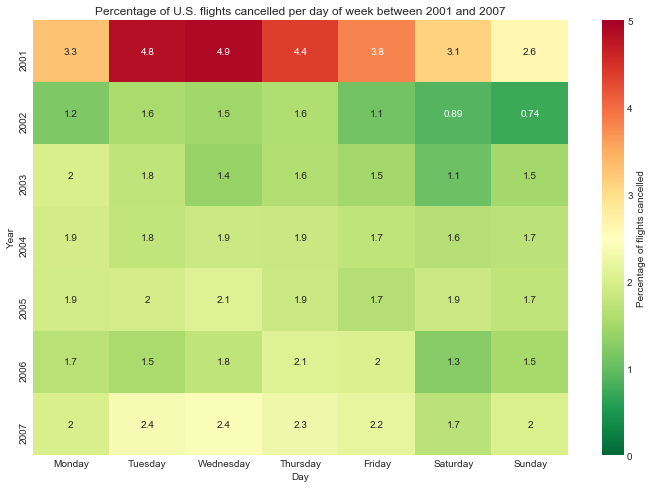

In [41]:
# calculate total number of flights cancelled per day of week
daycan = pd.DataFrame()
daycan = pdata[['Year','Day','Cancelled']]
daycan = daycan.groupby(['Year','Day']).agg('sum').unstack()

# calculate total number of flights per day of week
daycann = pd.DataFrame()
daycann = pdata[['Year','Day','Cancelled']]
daycann = daycann.groupby(['Year','Day']).agg('count').unstack()

# calculate percentage of flights cancelled per day of week
daycannn = (daycan/daycann)*100
daycannn.columns = daycannn.columns.droplevel(0)

# order results
daycannn = daycannn[new_orderd]

# plot results
fig, ax = plt.subplots(figsize=(12,8))
ax = sb.heatmap(daycannn, vmin=0, vmax=5, annot=True, cmap="RdYlGn_r", cbar_kws={'label': 'Percentage of flights cancelled'})
ax.set_title('Percentage of U.S. flights cancelled per day of week between 2001 and 2007')
plt.show()

The result looking at the cancellations by day of week does not indicate an obvious relationship apart from slightly higher flight cancellations during the working week compared to the weekend. There is a marked reduction in flight cancellations after 2001. 

Maybe there is a relationship between cancellations and the time of day:

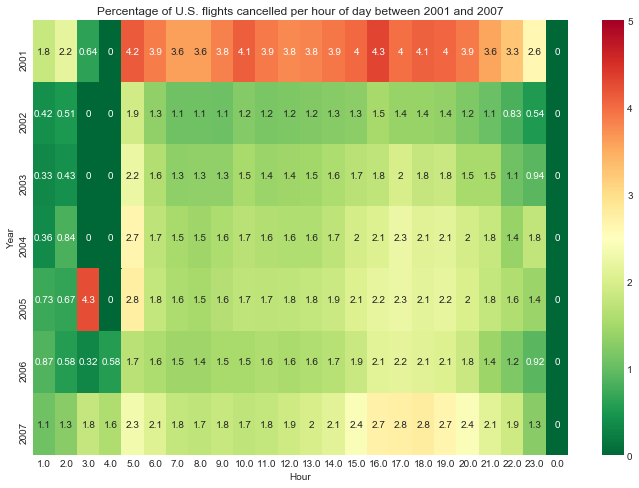

In [42]:
# calculate total number of flights cancelled per hour of day
hcan = pd.DataFrame()
hcan = pdata[['Year','Hour','Cancelled']]
hcan = hcan.groupby(['Year','Hour']).agg('sum').unstack()

# calculate total number of flights per day of week
hcann = pd.DataFrame()
hcann = pdata[['Year','Hour','Cancelled']]
hcann = hcann.groupby(['Year','Hour']).agg('count').unstack()

# calculate percentage of flights cancelled per day of week
hcannn = (hcan/hcann)*100
hcannn.columns = hcannn.columns.droplevel(0)

# fill nan and change 24 to 0
hcannn = hcannn.fillna(0)
hcannn = hcannn.rename(columns={24.0: 0.0})

# plot results
fig, ax = plt.subplots(figsize=(12,8))
ax = sb.heatmap(hcannn, vmin=0, vmax=5, annot=True, cmap="RdYlGn_r")
ax.set_title('Percentage of U.S. flights cancelled per hour of day between 2001 and 2007')
plt.show()

As can be seen above, the consistently warmer colours towards the late afternoon indicate an increase in the proportion of flight cancellations scheduled to depart at that time of day. This may be a result of delays occurring in the morning causing greater impact in the afternoon. There also appears to be a spike early in the morning which may indicate aircraft out of position for the early morning departures. 

Given the clearer relationship with month, year and cancellation rate, it will be interesting to include reason behind cancellation and see if the earlier insinuation of a weather-related cause of greater flight cancellations in the winter is founded:

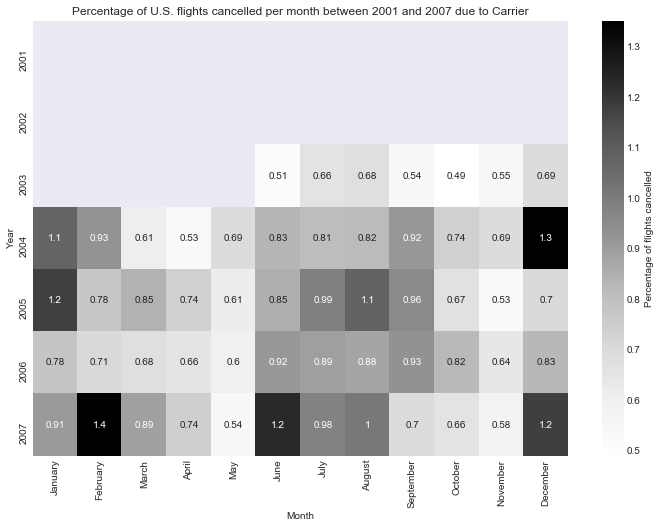

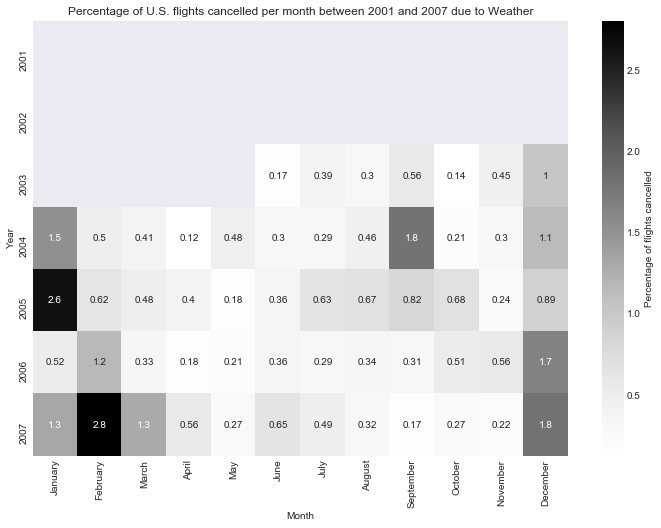

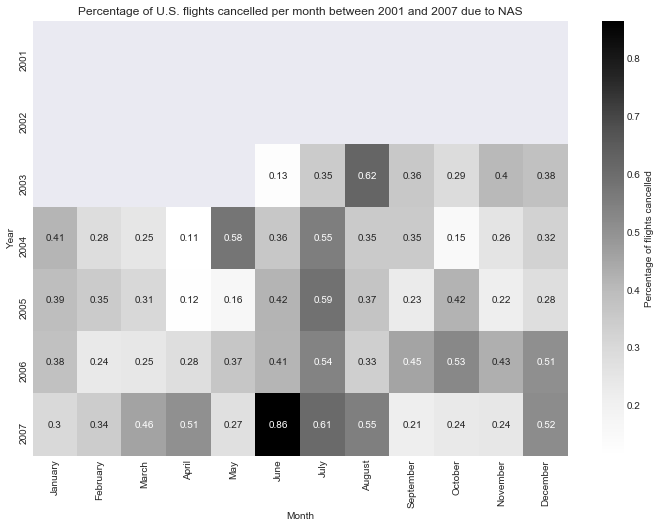

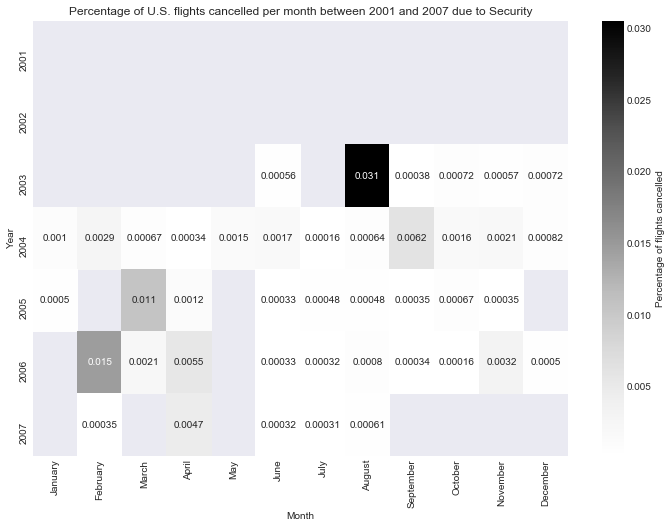

In [43]:
# calculate total number of flights cancelled per month
mncan = pd.DataFrame()
mncan = pdata[['Year','Month','Cancelled','CancellationCode']]

# calculate total number of flights per month
mncann = mncan[['Year','Month','Cancelled']]
mncann = mncann.groupby(['Year','Month']).agg('count').unstack()

var = ["Carrier", "Weather", "NAS", "Security"]

for v in var:
    mnweca = mncan[(mncan['CancellationCode'] == v)]
    mnweca.drop('CancellationCode', axis=1, inplace=True)
    mnweca = mnweca.groupby(['Year','Month']).agg('count').unstack()

    # calculate percentage of flights cancelled per month
    mncannn = (mnweca/mncann)*100
    mncannn.columns = mncannn.columns.droplevel(0)

    # order results
    mncannn = mncannn[new_order]

    # plot results
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sb.heatmap(mncannn, annot=True, cmap="Greys", cbar_kws={'label': 'Percentage of flights cancelled'})
    ax.set_title("Percentage of U.S. flights cancelled per month between 2001 and 2007 due to " + str(v))
    plt.show()

When broken down by reason for cancellation, there does appear to be an obvious relationship between weather-based cancellations of flights and the winter months. 

There is little obvious relationship between Carrier or Security and month/year of cancellation. 

There appears to be slightly increased cancellation of flights in the summer months by NAS. This could be related to the increase in flights during the summer months as observed during the univariate analysis. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Carrier cancellations have increased not just in number but in proportion to the total flights conducted by each carrier. 

It can be seen above that whilst winter months have a higher percentage of flight cancellations, it is not the case for every winter month of a particular year. There is much more variability perhaps indicating time-specific events such as bad weather existing in one month one year but not in the next. This was proven when weather was taken alone as the cancellation reason and has a very similar appearance to that observed in the gross percentage of flight cancellations.

There also appears to be slightly increased cancellation of flights in the summer months by NAS. This could be related to the increase in flights during the summer months as observed during the univariate analysis.

### Were there any interesting or surprising interactions between features?

Of note, September 2001 value is 20% of flights cancelled, probably due to the 9/11 terror attack. Interestingly, whilst 2001 was taken out of earlier analyses because it was viewed that the 9/11 terror attack was biasing results, the percentage of flight cancellations earlier in the year were also much higher than the following years potentially indicating that the terror attack has an impact on decreasing flight cancellations.